# A loan default client portrait monitoring system based on decision tree and Logistic regression model
## Loan Default with Decision Tree
Banks are concerned about the client's inability to repay the loan left the bank facing losses. They need to understand what characteristics users are at risk of defaulting on their loans.
### About the dataset
We will use a loan default dataset for predicting. This is a historical dataset where each row represents one client. The data is relatively easy to understand. Typically, strengthening risk control when lending is the best way to reduce the number of clients defaulting on loans, so the focus of this analysis is to predict who is 'risky' for the bank.

The dataset includes information about:


*   Income - monthly income of borrower; 
*   Balance - the amount of money deposited in the bank of the borrower; 

*   Student - if the borrower is a student;
*   Default - if the borrower defaults on a loan 

Information shows above is stored in the file 'LoanDefault.csv'

Import Needed Packages

In [3]:
import matplotlib.pyplot as plt
import pandas as pd
import pylab as pl
import numpy as np
%matplotlib inline
from sklearn.tree import DecisionTreeClassifier
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.externals.six import StringIO
import pydotplus
import matplotlib.image as mpimg
from sklearn import tree
from sklearn.metrics import confusion_matrix 

### Load Data From CSV File

In [172]:
df = pd.read_csv("LoanDefault.csv")

# take a look at the dataset
df.head()

,default,student,balance,income
0,No,No,729.526495,44361.625074
1,No,Yes,817.180407,12106.134700
2,No,No,1073.549164,31767.138947
3,No,No,529.250605,35704.493935
4,No,No,785.655883,38463.495879


### Pre-processing

Before starting analysis and modeling, wrangling data by identifying if there is any missing value and checking if there is any wrong data by get a statistical summary of each column.

In [173]:
print(df[df.isnull()==True].count())
df.describe()

default    0
student    0
balance    0
income     0
dtype: int64


,balance,income
count,10000.000000,10000.000000
mean,835.374886,33516.981876
std,483.714985,13336.639563
min,0.000000,771.967729
25%,481.731105,21340.462903
50%,823.636973,34552.644802
75%,1166.308386,43807.729272
max,2654.322576,73554.233495


It turns out that this dataframe has no missing values and the values in four columns are normal (i.e.no negative numbers in column 'balance' and 'income'). Now we can define X, and y for our dataset.

Using df as the LoanDefault.csv data read by pandas, declare the following variables:

    X as the Feature Matrix (data)
    y as the response vector (target)


In [11]:
X = df[['student', 'balance', 'income']].values
X[0:5]

array([['No', 729.5264952072861, 44361.62507426691],
       ['Yes', 817.180406555498, 12106.1347003149],
       ['No', 1073.54916401173, 31767.1389473999],
       ['No', 529.250604745278, 35704.4939350781],
       ['No', 785.655882930501, 38463.4958787229]], dtype=object)

Some features in this dataset are categorical such as 'student'. Since Sklearn Decision Trees do not handle categorical variables, we can convert these features to numerical values.

In [12]:
le_student = preprocessing.LabelEncoder()
le_student.fit(['No','Yes'])
X[:,0] = le_student.transform(X[:,0]) 

X[0:5]

array([[0, 729.5264952072861, 44361.62507426691],
       [1, 817.180406555498, 12106.1347003149],
       [0, 1073.54916401173, 31767.1389473999],
       [0, 529.250604745278, 35704.4939350781],
       [0, 785.655882930501, 38463.4958787229]], dtype=object)

Now we can fill the target variable.

In [13]:
y = df["default"]
y[0:5]

0    No
1    No
2    No
3    No
4    No
Name: default, dtype: object

### Setting up the Decision Tree
We will be using train/test split on our decision tree. Import train_test_split from sklearn.cross_validation.

#### Train Test Split

For our model having a high, out-of-sample accuracy, we use an evaluation approach called Train/Test Split. Our train_test_split will return 4 different parameters. We will name them:
X_trainset, X_testset, y_trainset, y_testset

The train_test_split will need the parameters:
X, y, test_size=0.3, and random_state=4.

The X and y are the arrays required before the split, the test_size represents the ratio of the testing dataset, and the random_state ensures that we obtain the same splits.

In [14]:
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.3, random_state=4)
print ('Train set:', X_train.shape,  y_train.shape)
print ('Test set:', X_test.shape,  y_test.shape)

Train set: (7000, 3) (7000,)
Test set: (3000, 3) (3000,)


#### Modeling
We will first create an instance of the DecisionTreeClassifier called drugTree.
Inside of the classifier, specify criterion="entropy" so we can see the information gain of each node.

In [15]:
defaultTree = DecisionTreeClassifier(criterion="entropy", max_depth = 4)
defaultTree # it shows the default parameters

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=4, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

Next, we will fit the data with the training feature matrix X_trainset and training response vector y_trainset

In [16]:
defaultTree.fit(X_train,y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=4, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

### Prediction
Let's make some predictions on the testing dataset and store it into a variable called predTree.

In [17]:
predTree = defaultTree.predict(X_test)

You can print out predTree and y_testset if you want to visually compare the prediction to the actual values.

In [18]:
print (predTree [0:5])
print (y_test [0:5])

['No' 'No' 'No' 'No' 'No']
1603    No
8713    No
4561    No
6600    No
2558    No
Name: default, dtype: object


### Evaluation
Next, let's import metrics from sklearn and check the accuracy of our model.

In [19]:
print("DecisionTrees's Accuracy: ", metrics.accuracy_score(y_test, predTree))

DecisionTrees's Accuracy:  0.973


Accuracy classification score computes subset accuracy: the set of labels predicted for a sample must exactly match the corresponding set of labels in y_true.

In multilabel classification, the function returns the subset accuracy. If the entire set of predicted labels for a sample strictly match with the true set of labels, then the subset accuracy is 1.0; otherwise it is 0.0.

---------------------------------------------------------------------------------------------------------------------------

Since the depth of decision tree affect the accuracy, traverse depth from 1 to 9 and computing the accracies, then select the most accurate depth.

In [20]:
for i in range(1,10):
    defaultTree = DecisionTreeClassifier(criterion="entropy", max_depth = i)
    defaultTree.fit(X_train,y_train)
    predTree = defaultTree.predict(X_test)
    print("Depth:", i, "-> DecisionTrees's Accuracy: ", metrics.accuracy_score(y_test, predTree))

Depth: 1 -> DecisionTrees's Accuracy:  0.9666666666666667
Depth: 2 -> DecisionTrees's Accuracy:  0.9723333333333334
Depth: 3 -> DecisionTrees's Accuracy:  0.9736666666666667
Depth: 4 -> DecisionTrees's Accuracy:  0.973
Depth: 5 -> DecisionTrees's Accuracy:  0.973
Depth: 6 -> DecisionTrees's Accuracy:  0.9733333333333334
Depth: 7 -> DecisionTrees's Accuracy:  0.9686666666666667
Depth: 8 -> DecisionTrees's Accuracy:  0.9686666666666667
Depth: 9 -> DecisionTrees's Accuracy:  0.968


According to the output, now we can choose the optimal depth, that is, 3, for model.

In [21]:
defaultTree = DecisionTreeClassifier(criterion="entropy", max_depth = 3)
defaultTree # it shows the default parameters

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=3, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [22]:
defaultTree.fit(X_train,y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=3, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [23]:
predTree = defaultTree.predict(X_test)
predTree

array(['No', 'No', 'No', ..., 'No', 'No', 'No'], dtype=object)

In [24]:
y_test

1603    No
8713    No
4561    No
6600    No
2558    No
        ..
3458    No
682     No
3128    No
8271    No
1031    No
Name: default, Length: 3000, dtype: object

### Visualization
Lets visualize the tree

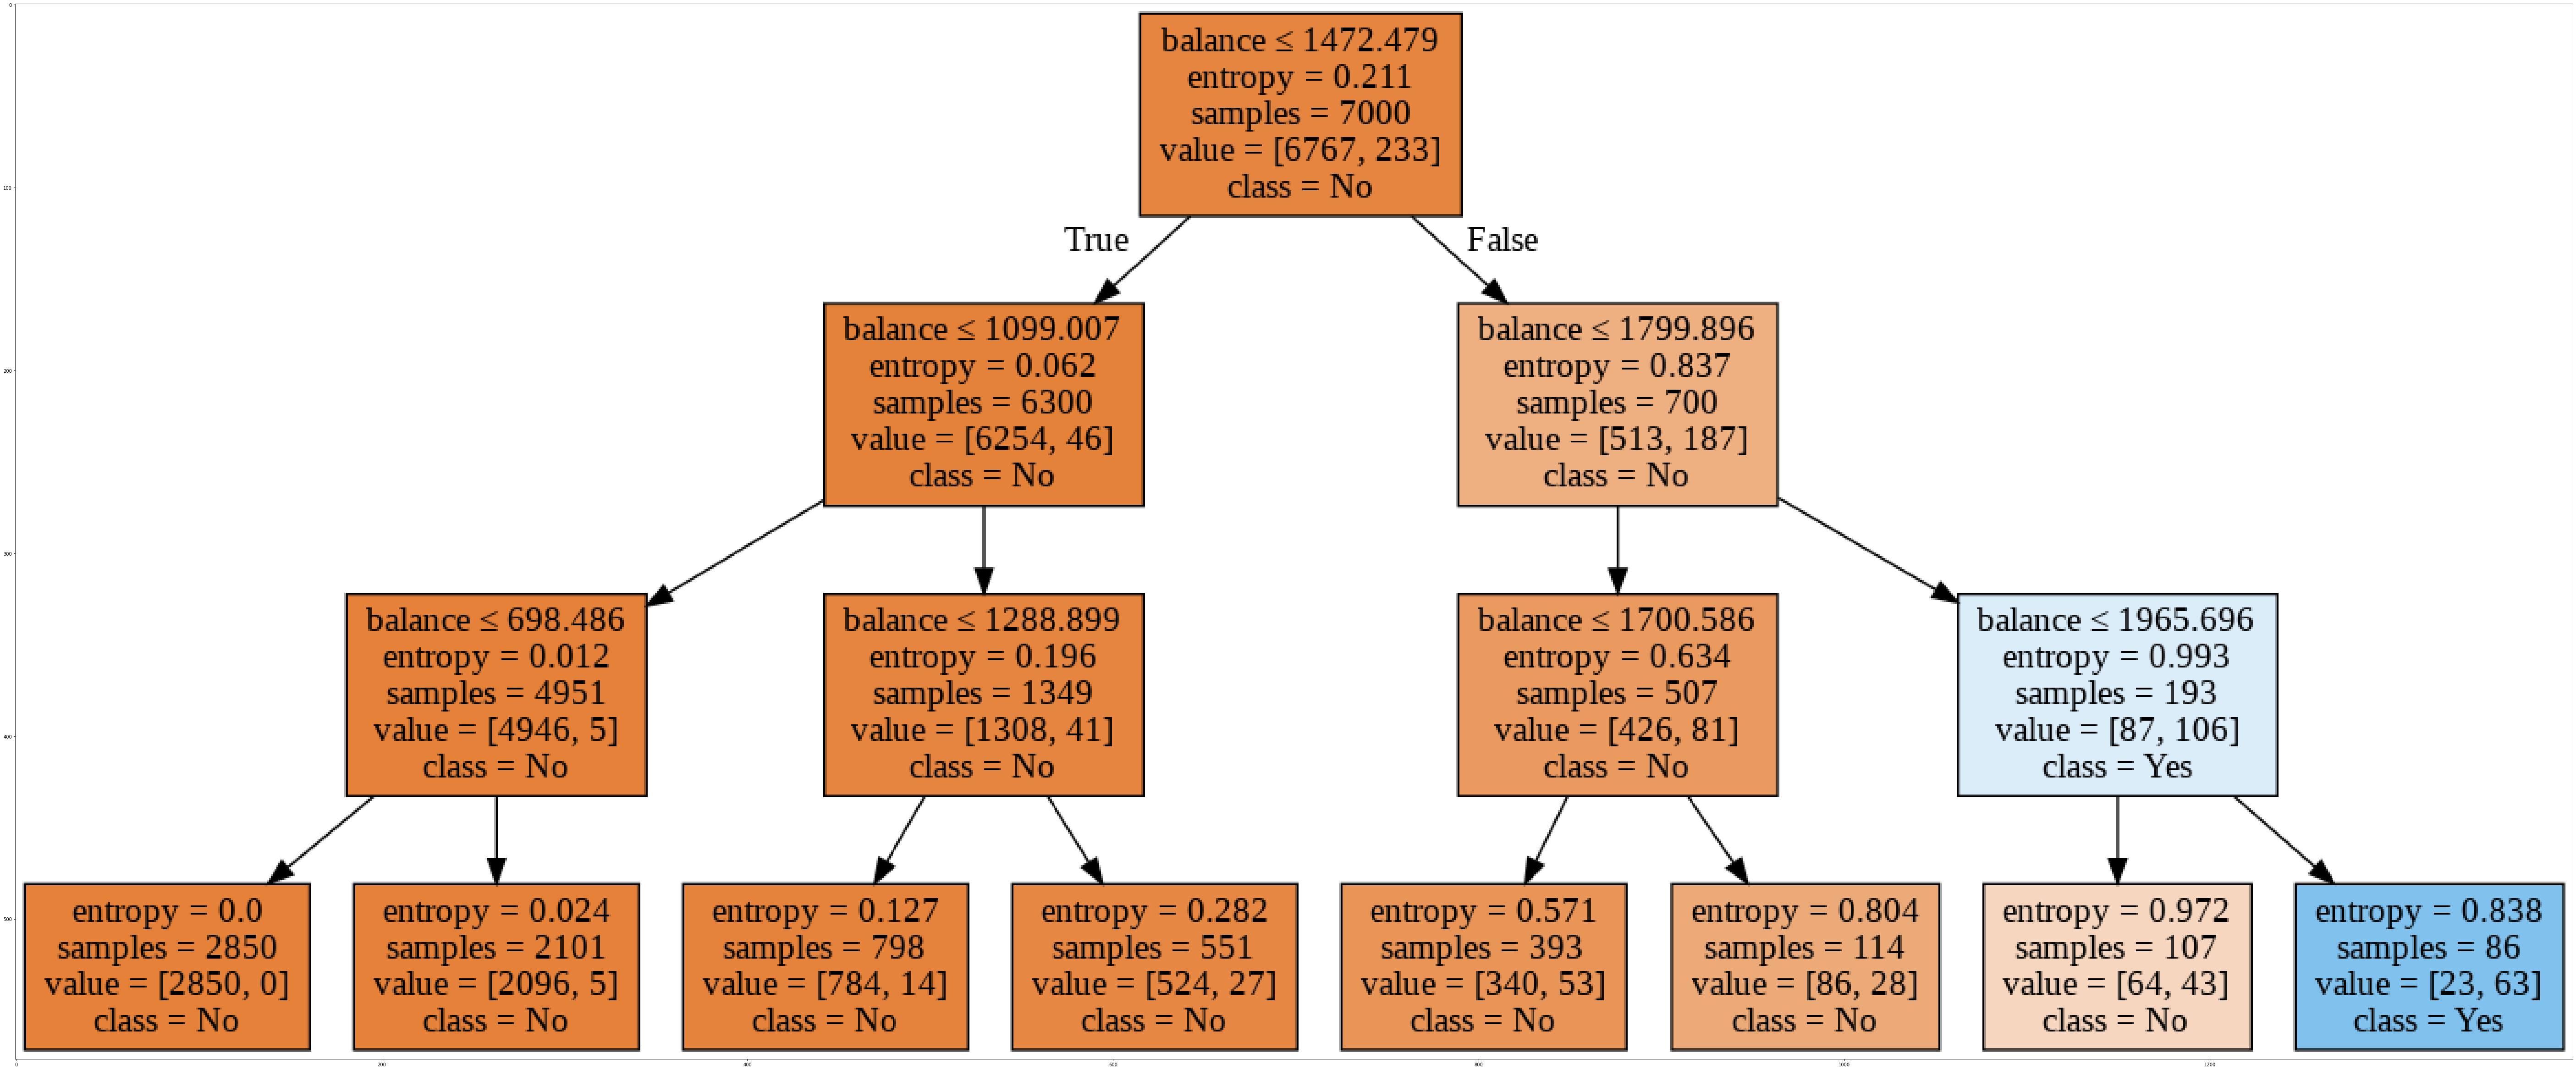

In [27]:
dot_data = StringIO()
filename = "defaulttree.png"
featureNames = df.columns[1:4]
targetNames = df["default"].unique().tolist()
out=tree.export_graphviz(defaultTree,feature_names=featureNames, out_file=dot_data, class_names= np.unique(y_train), filled=True, special_characters=True,rotate=False)  
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
graph.write_png(filename)
img = mpimg.imread(filename)
plt.figure(figsize=(100, 200))
plt.imshow(img,interpolation='nearest')

### Evaluation (Confusion Matrix)

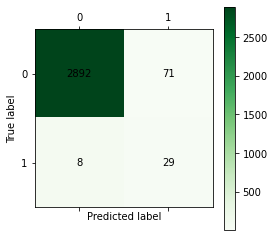

In [30]:
def cm_plot(y, yp):
 
  cm = confusion_matrix(y, yp) 
  
  plt.matshow(cm, cmap=plt.cm.Greens) 
  plt.colorbar() 
  
  for x in range(len(cm)): 
    for y in range(len(cm)):
      plt.annotate(cm[x,y], xy=(x, y), horizontalalignment='center', verticalalignment='center')
  
  plt.ylabel('True label') 
  plt.xlabel('Predicted label') 
  return plt
 
cm_plot(y_test, defaultTree.predict(X_test)).show()

The first row is for borrowers whose actual default value in test set is 0. As you can calculate, out of 3000 borrowers, the default value of 2963 of them is 0. And out of these 2963, the classifier correctly predicted 2892 of them as 0, and 71 of them as 1.

It means, for 2892 borrowers, the actual default value were 0 in test set, and classifier also correctly predicted those as 0. However, while the actual label of 71 borrowers were 0, the classifier predicted those as 1, which is a good job in predicting the borrowers with default value 0. 

What about the borrowers with default value 1? Lets look at the second row. It looks like there were 37 borrowers whom their default value were 1. The classifier correctly predicted 29 of them as 1, and 8 of them wrongly as 1, which is not very good. We can consider it as error of the model for second row.

In [35]:
print (classification_report(y_test, defaultTree.predict(X_test)))


              precision    recall  f1-score   support

          No       0.98      1.00      0.99      2900
         Yes       0.78      0.29      0.42       100

    accuracy                           0.97      3000
   macro avg       0.88      0.64      0.70      3000
weighted avg       0.97      0.97      0.97      3000



Based on the count of each section, we can calculate precision and recall of each label:

Precision is a measure of the accuracy provided that a class label has been predicted. It is defined by: precision = TP / (TP + FP)

Recall is true positive rate. It is defined as: Recall = TP / (TP + FN)

So, we can calculate precision and recall of each class.

## Logistic Regression

### The difference between Linear and Logistic Regression

While Linear Regression is suited for estimating continuous values (e.g. estimating house price), it is not the best tool for predicting the class of an observed data point. In order to estimate the class of a data point, we need some sort of guidance on what would be the most probable class for that data point. For this, we use Logistic Regression.

Recall linear regression:

Linear regression finds a function that relates a continuous dependent variable, y, to some predictors (independent variables  x1 ,  x2 , etc.). For example, Simple linear regression assumes a function of the form:

> y=θ0+θ1x1+θ2x2+⋯

and finds the values of parameters  θ0,θ1,θ2 , etc, where the term  θ0  is the "intercept". It can be generally shown as:

> ℎθ(𝑥)=θTX
 
Logistic Regression is a variation of Linear Regression, useful when the observed dependent variable, y, is categorical. It produces a formula that predicts the probability of the class label as a function of the independent variables.

Logistic regression fits a special s-shaped curve by taking the linear regression and transforming the numeric estimate into a probability with the following function, which is called sigmoid function 𝜎:

> ℎθ(𝑥)=σ(θTX)=e(θ0+θ1x1+θ2x2+...)1+e(θ0+θ1x1+θ2x2+⋯)
 
Or:

> ProbabilityOfaClass1=P(Y=1|X)=σ(θTX)=eθTX1+eθTX
 
In this equation, θTX is the regression result (the sum of the variables weighted by the coefficients), exp is the exponential function and σ(θTX) is the sigmoid or logistic function, also called logistic curve. It is a common "S" shape (sigmoid curve).

So, briefly, Logistic Regression passes the input through the logistic/sigmoid but then treats the result as a probability. The objective of Logistic Regression algorithm, is to find the best parameters θ, for ℎθ(𝑥) = σ(θTX) , in such a way that the model best predicts the class of each case.

### Loan Default with Logistic Regression

Banks are concerned about the client's inability to repay the loan left the bank facing losses. They need to understand what characteristics users are at risk of defaulting on their loans.


#### About the dataset

We will use a loan default dataset for predicting. This is a historical dataset where each row represents one client. The data is relatively easy to understand. Typically, strengthening risk control when lending is the best way to reduce the number of clients defaulting on loans, so the focus of this analysis is to predict who is 'risky' for the bank.

The dataset includes information about:


*   Income - monthly income of borrower; 
*   Balance - the amount of money deposited in the bank of the borrower; 

*   Student - if the borrower is a student;
*   Default - if the borrower defaults on a loan 

Information shows above is stored in the file 'LoanDefault.csv'

Firstly, import needed packages.

In [ ]:
import statsmodels.api as sm
import pandas as pd
import pylab as pl
import numpy as np
import scipy.optimize as opt
from sklearn import preprocessing
%matplotlib inline 
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix
import itertools

#### Load Data From CSV File

In [139]:
df = pd.read_csv("LoanDefault.csv")

# take a look at the dataset
df.head()

,default,student,balance,income
0,No,No,729.526495,44361.625074
1,No,Yes,817.180407,12106.134700
2,No,No,1073.549164,31767.138947
3,No,No,529.250605,35704.493935
4,No,No,785.655883,38463.495879


#### Data pre-processing and selection

As dataframe shows, some features in this dataset are categorical such as 'student' or 'default'. We can convert these features to numerical values. pandas.get_dummies() Convert categorical variable into dummy/indicator variables and select useful features for modeling.

In [140]:
df = pd.get_dummies(df)
df.drop(df.columns[[2, 4]],axis=1, inplace=True)
df

,balance,income,default_Yes,student_Yes
0,729.526495,44361.625074,0,0
1,817.180407,12106.134700,0,1
2,1073.549164,31767.138947,0,0
3,529.250605,35704.493935,0,0
4,785.655883,38463.495879,0,0
5,919.588530,7491.558572,0,1
6,825.513331,24905.226578,0,0
7,808.667504,17600.451344,0,1
8,1161.057854,37468.529288,0,0
9,0.000000,29275.268293,0,0


Before starting analysis and modeling, wrangling data by identifying if there is any missing value and checking if there is any wrong data by get a statistical summary of each column.

In [141]:
print(df[df.isnull()==True].count())
df.describe()

balance        0
income         0
default_Yes    0
student_Yes    0
dtype: int64


,balance,income,default_Yes,student_Yes
count,10000.000000,10000.000000,10000.000000,10000.000000
mean,835.374886,33516.981876,0.033300,0.294400
std,483.714985,13336.639563,0.179428,0.455795
min,0.000000,771.967729,0.000000,0.000000
25%,481.731105,21340.462903,0.000000,0.000000
50%,823.636973,34552.644802,0.000000,0.000000
75%,1166.308386,43807.729272,0.000000,1.000000
max,2654.322576,73554.233495,1.000000,1.000000


It turns out that this dataframe has no missing values and the values in four columns are normal (i.e.no negative numbers in column 'balance' and 'income'). Now we can define X, and y for our dataset.

In [149]:
X = np.asarray(df[['income', 'balance', 'student_Yes']])
X[0:5]

array([[4.43616251e+04, 7.29526495e+02, 0.00000000e+00],
       [1.21061347e+04, 8.17180407e+02, 1.00000000e+00],
       [3.17671389e+04, 1.07354916e+03, 0.00000000e+00],
       [3.57044939e+04, 5.29250605e+02, 0.00000000e+00],
       [3.84634959e+04, 7.85655883e+02, 0.00000000e+00]])

In [150]:
y = np.asarray(df['default_Yes'])
y [0:5]

array([0, 0, 0, 0, 0], dtype=uint8)

Also, we normalize the dataset:

In [151]:
X = preprocessing.StandardScaler().fit(X).transform(X)
X[0:5]

array([[ 0.81318727, -0.21883482, -0.64593619],
       [-1.60549572, -0.03761593,  1.54814054],
       [-0.13121225,  0.49241019, -0.64593619],
       [ 0.16403093, -0.6328925 , -0.64593619],
       [ 0.37091513, -0.10279088, -0.64593619]])

#### Train/Test dataset

Split the dataset into train and test set:

In [152]:
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.3, random_state=2)
print ('Train set:', X_train.shape,  y_train.shape)
print ('Test set:', X_test.shape,  y_test.shape)

Train set: (7000, 3) (7000,)
Test set: (3000, 3) (3000,)


### Modeling (Logistic Regression with Scikit-learn)

Build our model using LogisticRegression from Scikit-learn package. This function implements logistic regression and can use different numerical optimizers to find parameters, including ‘newton-cg’, ‘lbfgs’, ‘liblinear’, ‘sag’, ‘saga’ solvers. Here the solver 'liblinear' is used due to the scale of the dataset. Now fit our model with train set:

In [153]:
LR = LogisticRegression(C=0.01, solver='liblinear').fit(X_train,y_train)
LR

LogisticRegression(C=0.01, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

Now we can predict using our test set:

In [154]:
yhat = LR.predict(X_test)
yhat

array([0, 0, 0, ..., 0, 0, 0], dtype=uint8)

__predict_proba__ returns estimates for all classes, ordered by the label of classes. So, the first column is the probability of class 1, P(Y=1|X), and second column is probability of class 0, P(Y=0|X):

In [155]:
yhat_prob = LR.predict_proba(X_test)
yhat_prob

array([[0.95240624, 0.04759376],
       [0.94934741, 0.05065259],
       [0.95950125, 0.04049875],
       ...,
       [0.87913474, 0.12086526],
       [0.98455597, 0.01544403],
       [0.91853669, 0.08146331]])

### Evaluation (Confusion Matrix)

In [156]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
print(confusion_matrix(y_test, yhat, labels=[1,0]))

[[   1   75]
 [   0 2924]]


Confusion matrix, without normalization
[[   1   75]
 [   0 2924]]


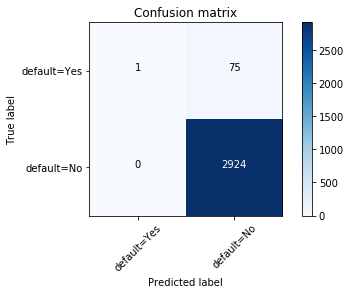

In [171]:
# Compute confusion matrix
cnf_matrix = confusion_matrix(y_test, yhat, labels=[1,0])
np.set_printoptions(precision=2)


# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=['default=Yes','default=No'],normalize= False,  title='Confusion matrix')

The first row is for borrowers whose actual default value in test set is 1. As you can calculate, out of 3000 borrowers, the default value of 76 of them is 1. And out of these 76, the classifier correctly predicted 1 of them as 1, and 75 of them as 0.

It means, for 1 borrowers, the actual default value were 1 in test set, and classifier also correctly predicted those as 1. However, while the actual label of 75 borrowers were 1, the classifier predicted those as 0, which is not very good. We can consider it as error of the model for first row. 

What about the borrowers with default value 0? Lets look at the second row. It looks like there were 2924 borrowers whom their default value were 0. The classifier correctly predicted 2924 of them as 0, and none of them wrongly as 1. So, it has done a good job in predicting the borrowers with default value 0.

In [158]:
print (classification_report(y_test, yhat))

             precision    recall  f1-score   support

          0       0.97      1.00      0.99      2924
          1       1.00      0.01      0.03        76

avg / total       0.98      0.97      0.96      3000



Based on the count of each section, we can calculate precision and recall of each label:

Precision is a measure of the accuracy provided that a class label has been predicted. It is defined by: precision = TP / (TP + FP)

Recall is true positive rate. It is defined as: Recall = TP / (TP + FN)

So, we can calculate precision and recall of each class.

------------------------------------------------------------------------------------------------------------------------------


The calculation above demonstrated a normal logistic regression modeling process, which is based on a default threshold: 0.5. However, our target is to block borrowers who cannot repay the loan rather than losing potential clients. Now we do this by adjusting the threshold. Here I illustrate all confusion matrices with threshold from 0.1 to 0.9.

Recall metric in the testing dataset:  0.9473684210526315
Confusion matrix, without normalization
[[2275  649]
 [   4   72]]
Recall metric in the testing dataset:  0.631578947368421
Confusion matrix, without normalization
[[2814  110]
 [  28   48]]
Recall metric in the testing dataset:  0.23684210526315788
Confusion matrix, without normalization
[[2914   10]
 [  58   18]]
Recall metric in the testing dataset:  0.039473684210526314
Confusion matrix, without normalization
[[2922    2]
 [  73    3]]
Recall metric in the testing dataset:  0.013157894736842105
Confusion matrix, without normalization
[[2924    0]
 [  75    1]]
Recall metric in the testing dataset:  0.0
Confusion matrix, without normalization
[[2924    0]
 [  76    0]]
Recall metric in the testing dataset:  0.0
Confusion matrix, without normalization
[[2924    0]
 [  76    0]]
Recall metric in the testing dataset:  0.0
Confusion matrix, without normalization
[[2924    0]
 [  76    0]]
Recall metric in the testing dataset:  0.

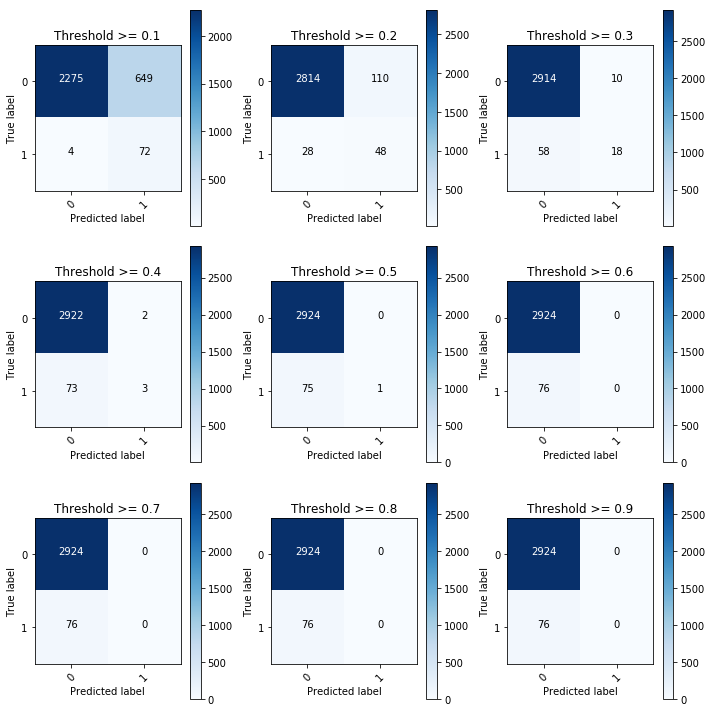

In [160]:
lr = LogisticRegression(C = 0.01,  solver='liblinear')
lr.fit(X_train,y_train)
Y_pred_proba = lr.predict_proba(X_test)

thresholds = [0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]

plt.figure(figsize=(10,10))

j = 1
for i in thresholds:
    Y_test_predictions_high_recall = Y_pred_proba[:,1] > i
    
    plt.subplot(3,3,j)
    j += 1
    
    # Compute confusion matrix
    cnf_matrix = confusion_matrix(y_test,Y_test_predictions_high_recall)
    np.set_printoptions(precision=2)

    print("Recall metric in the testing dataset: ", cnf_matrix[1,1]/(cnf_matrix[1,0]+cnf_matrix[1,1]))

    # Plot non-normalized confusion matrix
    class_names = [0,1]
    plot_confusion_matrix(cnf_matrix
                          , classes=class_names
                          , title='Threshold >= %s'%i) 
plt.savefig("threshold_nonpen.jpg")

In [165]:
Y_test_predictions_high_recall = Y_pred_proba[:,1] > 0.1
print ('Threshold=0.1')
print(classification_report(y_test, Y_test_predictions_high_recall))
print('Accuracy when threshold = 0.1: ',metrics.accuracy_score(y_test, Y_test_predictions_high_recall))
Y_test_predictions_high_recall = Y_pred_proba[:,1] > 0.2
print('---------------------------------------------------------')
print ('Threshold=0.2')
print(classification_report(y_test, Y_test_predictions_high_recall))
print('Accuracy when threshold = 0.2: ',metrics.accuracy_score(y_test, Y_test_predictions_high_recall))

Threshold=0.1
             precision    recall  f1-score   support

          0       1.00      0.78      0.87      2924
          1       0.10      0.95      0.18        76

avg / total       0.98      0.78      0.86      3000

Accuracy when threshold = 0.1:  0.7823333333333333
---------------------------------------------------------
Threshold=0.2
             precision    recall  f1-score   support

          0       0.99      0.96      0.98      2924
          1       0.30      0.63      0.41        76

avg / total       0.97      0.95      0.96      3000

Accuracy when threshold = 0.2:  0.954


In dealing with larger dataset, we can add a paremeter __penalty = 'l2'__ in LogisticRegression(),which is used to avoid overfits to improve the generalization of functions.

Recall metric in the testing dataset:  0.9473684210526315
Confusion matrix, without normalization
[[2275  649]
 [   4   72]]
Recall metric in the testing dataset:  0.631578947368421
Confusion matrix, without normalization
[[2814  110]
 [  28   48]]
Recall metric in the testing dataset:  0.23684210526315788
Confusion matrix, without normalization
[[2914   10]
 [  58   18]]
Recall metric in the testing dataset:  0.039473684210526314
Confusion matrix, without normalization
[[2922    2]
 [  73    3]]
Recall metric in the testing dataset:  0.013157894736842105
Confusion matrix, without normalization
[[2924    0]
 [  75    1]]
Recall metric in the testing dataset:  0.0
Confusion matrix, without normalization
[[2924    0]
 [  76    0]]
Recall metric in the testing dataset:  0.0
Confusion matrix, without normalization
[[2924    0]
 [  76    0]]
Recall metric in the testing dataset:  0.0
Confusion matrix, without normalization
[[2924    0]
 [  76    0]]
Recall metric in the testing dataset:  0.

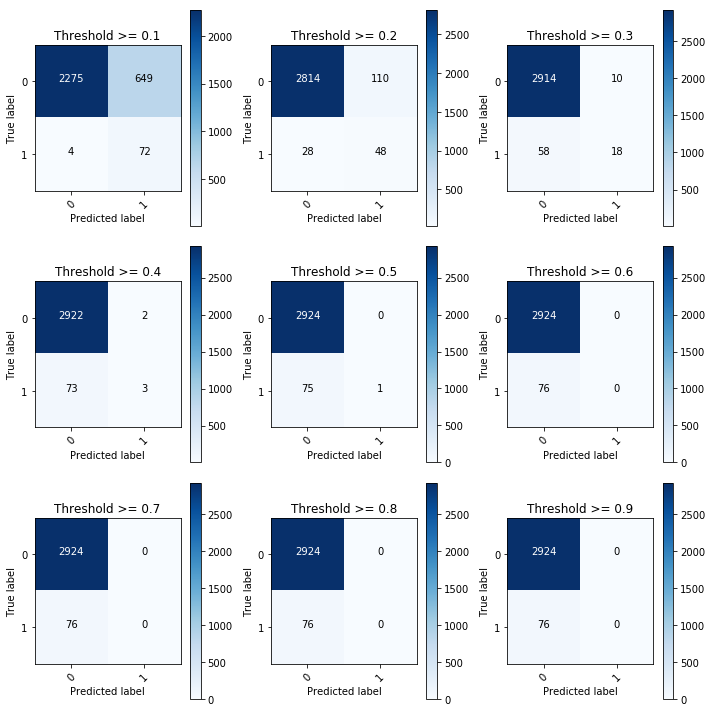

In [159]:
#lr = LogisticRegression(C = 0.01, penalty = 'l2')
#lr.fit(X_train,y_train)
#Y_pred_proba = lr.predict_proba(X_test)

#thresholds = [0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]

#plt.figure(figsize=(10,10))

#j = 1
#for i in thresholds:
    #Y_test_predictions_high_recall = Y_pred_proba[:,1] > i
    
    #plt.subplot(3,3,j)
    #j += 1
    
    # Compute confusion matrix
    #cnf_matrix = confusion_matrix(y_test,Y_test_predictions_high_recall)
    #np.set_printoptions(precision=2)

    #print("Recall metric in the testing dataset: ", cnf_matrix[1,1]/(cnf_matrix[1,0]+cnf_matrix[1,1]))

    # Plot non-normalized confusion matrix
    class_names = [0,1]
    plot_confusion_matrix(cnf_matrix
                          , classes=class_names
                          , title='Threshold >= %s'%i) 
#plt.savefig("threshold cm.jpg")